In [16]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time

**OI** PESSOAL

In [3]:
#A = np.array([[0,1,2,3,1,2,3,4],
 #             [1,0,1,2,2,1,2,3],
  #           [2,1,0,1,3,2,1,2],
   #           [3,2,1,0,4,3,2,1],
    #          [1,2,3,4,0,1,2,3],
     #         [2,1,2,3,1,0,1,2],
      #        [3,2,1,2,2,1,0,1],
       #       [4,3,2,1,3,2,1,0]])
#RHS  = np.array([10,15,6,11,7,12,23,10])

A = np.array([[0,1,2,3,1,2,3,4],
              [1,0,1,2,2,1,2,3],
              [2,1,0,1,3,2,1,2],
              [3,2,1,0,4,3,2,1]])

RHS  = np.array([10,15,6,8])


row, col = A.shape

Utility  = np.array([1,5,2,4,1,3,4,3])

print(row)
print(col)

print(A)

4
8
[[0 1 2 3 1 2 3 4]
 [1 0 1 2 2 1 2 3]
 [2 1 0 1 3 2 1 2]
 [3 2 1 0 4 3 2 1]]


In [21]:
with open('Knap_C150I200.dat') as f:
    row = [int(x) for x in next(f).split()] # read first line
    empty = [int(x) for x in next(f).split()] # read next line
    col = [int(x) for x in next(f).split()] # read next line
    empty = [int(x) for x in next(f).split()] # read next line
    empty = [int(x) for x in next(f).split()] # read next line

    Utility = []
    Utility.append([float(x) for x in next(f).split()])

    Utility =Utility[0]

    empty = [int(x) for x in next(f).split()] # read next line

    A = []
    count = 0
    while count < row[0]: # read rest of lines
        A.append([float(x) for x in next(f).split()])
        count = count + 1
    
    empty = [int(x) for x in next(f).split()] # read next line

    RHS = []
    RHS.append([float(x) for x in next(f).split()])
    RHS =RHS[0]

RHS = np.array(RHS)
A = np.array(A)
Utility = np.array(Utility)

row, col = A.shape
print(row)
print(col)

print(A)

150
200
[[23.47747 10.80426 12.22253 ... 23.19172  8.26664 12.40329]
 [ 8.10977  0.89613 11.18788 ... 20.45178  7.99894 13.21124]
 [24.01744 11.19025 24.49414 ... 14.86728 24.36909 21.25069]
 ...
 [17.16083 22.12308 22.54983 ...  8.99214  5.90225 24.12901]
 [23.73312  7.61051  9.86352 ... 23.58698  1.3732   4.29888]
 [ 7.04156 22.57856  2.82839 ... 18.26934  2.73249 24.92233]]


In [23]:
# Define a Objective function
def of(c,x):
  return sum(c*x)

def feasibility(a,b,x):
  Feasible = True
  for i in range(row):
    if sum(a[i]*x) > b[i]:
      Feasible = False
  return Feasible


def neigh_changeOne(x):
  if printAll: print("input ChangeOne: \t", x)
  xx = x.copy() #copy the solution to preserve the original
  bestX = x.copy()
  bestOF = of(bestX,Utility)

  for i in range(col):
    xx[i] = (1-xx[i])
    if printAll: print("ChangeOne(",i, "): ", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
    if feasibility(A,RHS,xx):
      Obj = of(xx,Utility)
      if(Obj > bestOF):
        bestX = xx.copy()
        bestOF = Obj
        if printAll: print("*ChangeOne(",i, "):", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
    xx[i] = (1-xx[i])

  return bestX, bestOF

def randInitialSolution(x):
  x = np.array([0,0,0,0,0,0,0,0])
  a = 0;
  while feasibility(A,RHS,x):
    a = np.random.randint(1, high = col, size=1)
    x[a] = 1
  x[a] = 0
  print("Initial: ",x)
  return x

def perturbation(x, alpha):
  a = 0;
  print("In:", x)
  for i in range(col):
    if x[i] == 1:
      if np.random.random_sample() < alpha:
        x[i] = 0
  print("Out:", x)
  return x


    

In: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Out: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 

Text(0.5, 0, '# Round')

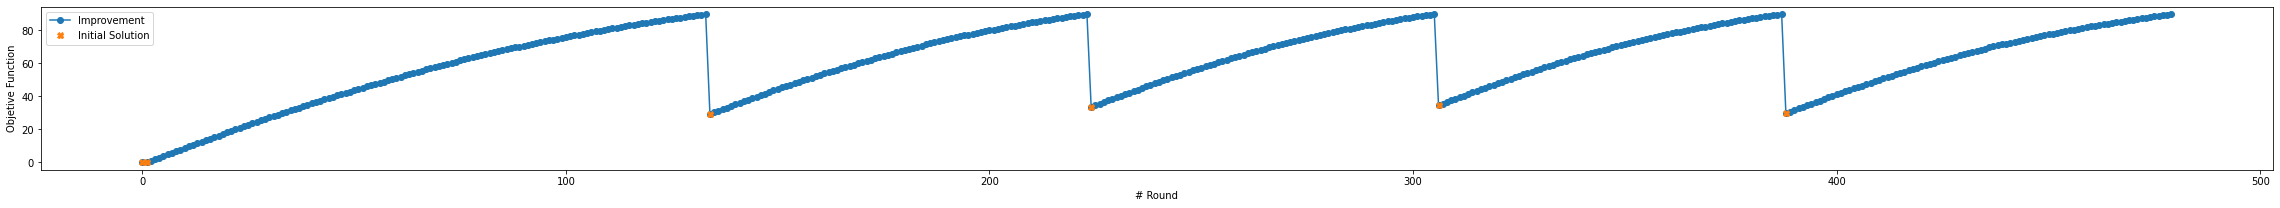

In [24]:
X0 = np.zeros(col)

count = 0
limit = 5

bestGlobal = X0.copy()
bestOF_Global = 0 

bestX = X0.copy()
bestOF_ant = 0 

printAll = False

history = [0]
initialSolution = [0]

t1_start = process_time() 
while count < limit:
  alpha = 0.7;

  X0 = perturbation(X0, alpha)
  bestX = X0.copy()
  bestOF_ant = 0 
  bestOF = of(Utility,X0)
  improvement = True
  history.append(bestOF)
  initialSolution.append(bestOF)

  while improvement:
    bestX, bestOF = neigh_changeOne(bestX)
    if bestOF > bestOF_ant:
      bestOF_ant = bestOF
      history.append(bestOF)
      initialSolution.append(np.nan)
      X0 = bestX
    else: 
      improvement = False

  count = count + 1
  if bestOF_Global > bestOF:
    bestOF_Global = bestOF


# Stop the stopwatch / counter
t1_stop = process_time()
      
print("Elapsed time during the whole program in seconds:",
t1_stop-t1_start) 

plt.plot(history, "-o", label = "Improvement")
plt.plot(initialSolution, "X", label = "Initial Solution")
plt.rcParams["figure.figsize"] = (40,3)
plt.legend()
plt.ylabel('Objetive Function')
plt.xlabel('# Round')

#plt.annotate('local max', xy=(30, 16), xytext=(15, 16),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

